In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('data/is24_89737_1530561783410.csv', index_col=0, encoding='utf-8', engine='python')[['address_city',
    'address_quarter',
    'address_postcode',
    'address_wgs84Coordinate_latitude',
    'address_wgs84Coordinate_longitude',
    'balcony',
    'builtInKitchen',
    'calculatedPrice_marketingType',
    'calculatedPrice_priceIntervalType',
    'calculatedPrice_rentScope',
    'calculatedPrice_value',
    'energyPerformanceCertificate',
    'floorplan',
    'garden',
    'livingSpace',
    'numberOfRooms',
    'price_value',
    'privateOffer']]

In [3]:
df.head()

,address_city,address_quarter,address_postcode,address_wgs84Coordinate_latitude,address_wgs84Coordinate_longitude,balcony,builtInKitchen,calculatedPrice_marketingType,calculatedPrice_priceIntervalType,calculatedPrice_rentScope,calculatedPrice_value,energyPerformanceCertificate,floorplan,garden,livingSpace,numberOfRooms,price_value,privateOffer
@id,,,,,,,,,,,,,,,,,,
103714113,Magdeburg,Werder,39114.0,52.13008,11.65215,true,false,BUDGET_RENT,MONTH,WARM_RENT,1275.15,NaN,true,false,100.00,3.0,1025.15,false
91645737,Magdeburg,Altstadt,39104.0,52.13484,11.64833,true,false,BUDGET_RENT,MONTH,WARM_RENT,2082.65,true,true,false,148.65,4.0,1700.00,false
105292933,Erfurt,Löbervorstadt,99096.0,50.96571,11.03207,false,false,BUDGET_RENT,MONTH,WARM_RENT,683.00,true,true,false,63.33,2.0,538.00,false
105248601,Berlin,Köpenick (Köpenick),12557.0,52.43243,13.57142,true,true,BUDGET_RENT,MONTH,WARM_RENT,809.90,true,false,false,78.00,3.0,626.00,false
105623436,Bremerhaven,Wulsdorf,27572.0,53.50972,8.59401,true,true,BUDGET_RENT,MONTH,WARM_RENT,535.00,true,false,false,59.09,2.0,355.00,false


In [58]:
filtered_df = df[(df.livingSpace < 70) &
   (df.calculatedPrice_value < 900) &
   (df.address_city.str.contains('Berlin'))]
len(filtered_df)

981

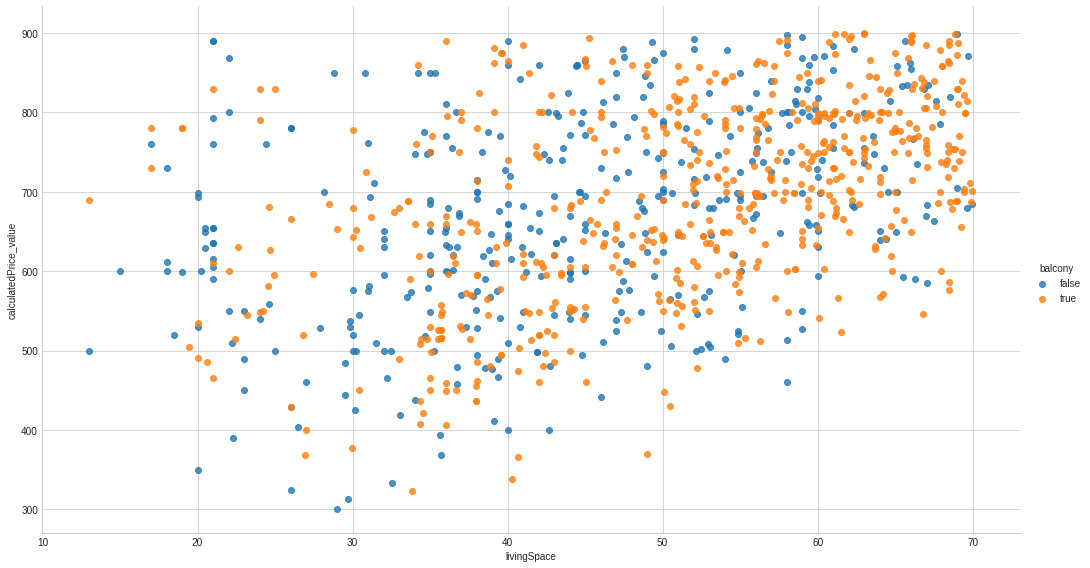

In [59]:
sns.lmplot('livingSpace',
           'calculatedPrice_value',
           data=filtered_df,
           fit_reg=False,
           hue='balcony',
           size=8,
           aspect=1.8);

In [86]:
mean_df = df.groupby('address_city').median()
mean_df = mean_df[mean_df.calculatedPrice_value < 2000][['calculatedPrice_value']].sort_values(by=['calculatedPrice_value'], ascending=False)
mean_df[:100]

,calculatedPrice_value
address_city,
München,1650.00
München (Kreis),1500.00
Starnberg (Kreis),1475.00
Frankfurt am Main,1450.00
Miesbach (Kreis),1400.00
Ebersberg (Kreis),1387.50
Stuttgart,1305.66
Bad Tölz-Wolfratshausen (Kreis),1300.00
Emmendingen (Kreis),1270.00
